In [1]:
import numpy as np
from scipy.stats import pearsonr


subject1_correlations = np.load('Data_last/3Sea_Sub1_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject2_correlations = np.load('Data_last/3Sea_Sub2_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject3_correlations = np.load('Data_last/3Sea_Sub3_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject4_correlations = np.load('Data_last/3Sea_Sub4_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject5_correlations = np.load('Data_last/3Sea_Sub5_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject6_correlations = np.load('Data_last/3Sea_Sub6_Par_correlations.npy', allow_pickle=True).reshape((1, 444))


subject_brain_maps = [
    subject1_correlations,
    subject2_correlations,
    subject3_correlations,
    subject4_correlations,
    subject5_correlations,
    subject6_correlations
]


correlation_values = []

# Compute correlations between each pair of subjects
for i in range(len(subject_brain_maps)):
    for j in range(i + 1, len(subject_brain_maps)):
        # Compute Pearson correlation coefficient between subject i and subject j
        corr_coef, _ = pearsonr(subject_brain_maps[i].flatten(), subject_brain_maps[j].flatten())
        correlation_values.append(corr_coef)

#Calculate the average, minimum, and maximum correlation values
average_corr = np.mean(correlation_values)
min_corr = np.min(correlation_values)
max_corr = np.max(correlation_values)

print(f"Average correlation across all subject pairs: {average_corr:.4f}")
print(f"Minimum correlation across all subject pairs: {min_corr:.4f}")
print(f"Maximum correlation across all subject pairs: {max_corr:.4f}")


Average correlation across all subject pairs: 0.8334
Minimum correlation across all subject pairs: 0.7889
Maximum correlation across all subject pairs: 0.8737


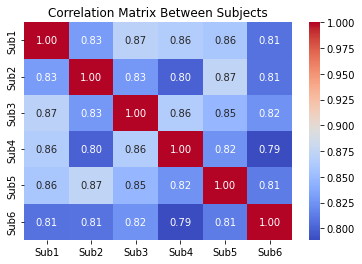

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Step 1: Load correlation data for each subject individually
subject1_correlations = np.load('Data_last/3Sea_Sub1_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject2_correlations = np.load('Data_last/3Sea_Sub2_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject3_correlations = np.load('Data_last/3Sea_Sub3_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject4_correlations = np.load('Data_last/3Sea_Sub4_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject5_correlations = np.load('Data_last/3Sea_Sub5_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject6_correlations = np.load('Data_last/3Sea_Sub6_Par_correlations.npy', allow_pickle=True).reshape((1, 444))

# Step 2: Store these in a list
subject_brain_maps = [
    subject1_correlations,
    subject2_correlations,
    subject3_correlations,
    subject4_correlations,
    subject5_correlations,
    subject6_correlations
]

# Step 3: Create a matrix to store correlation values
correlation_matrix = np.zeros((6, 6))

# Step 4: Compute correlations and populate the matrix
for i in range(len(subject_brain_maps)):
    for j in range(len(subject_brain_maps)):
        corr_coef, _ = pearsonr(subject_brain_maps[i].flatten(), subject_brain_maps[j].flatten())
        correlation_matrix[i, j] = corr_coef

# Step 5: Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=[f'Sub{i+1}' for i in range(6)], yticklabels=[f'Sub{i+1}' for i in range(6)])
plt.title('Correlation Matrix Between Subjects')
plt.show()


In [3]:
len (subject_brain_maps[0].flatten())

444

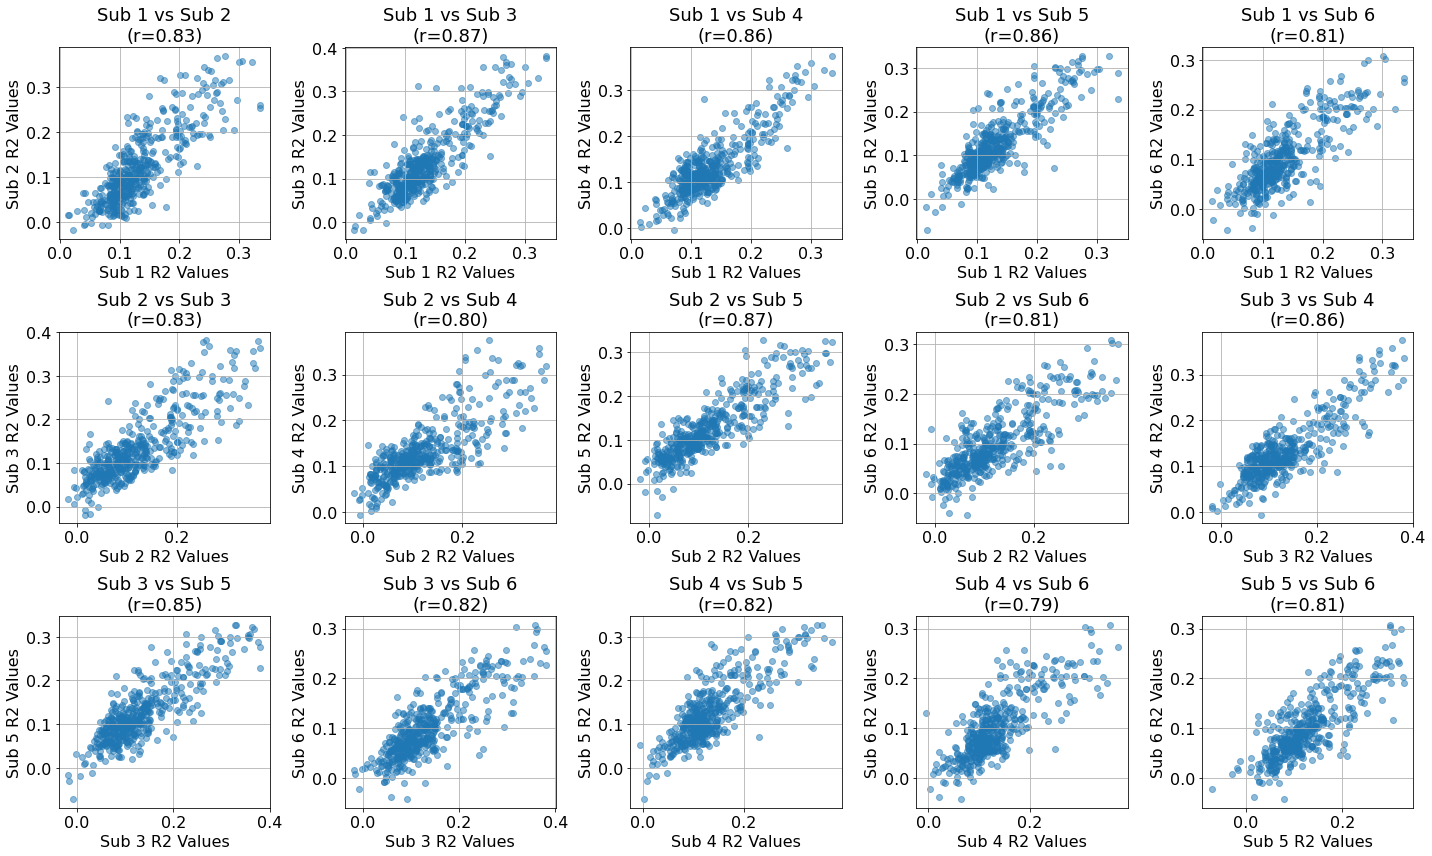

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the brain maps as previously done
subject1_correlations = np.load('Data_last/3Sea_Sub1_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject2_correlations = np.load('Data_last/3Sea_Sub2_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject3_correlations = np.load('Data_last/3Sea_Sub3_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject4_correlations = np.load('Data_last/3Sea_Sub4_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject5_correlations = np.load('Data_last/3Sea_Sub5_Par_correlations.npy', allow_pickle=True).reshape((1, 444))
subject6_correlations = np.load('Data_last/3Sea_Sub6_Par_correlations.npy', allow_pickle=True).reshape((1, 444))

subject_brain_maps = [
    subject1_correlations,
    subject2_correlations,
    subject3_correlations,
    subject4_correlations,
    subject5_correlations,
    subject6_correlations
]

# Create a 3x5 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Font size settings
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 16

# Generate and assign scatter plots to subplots
plot_index = 0
num_subjects = len(subject_brain_maps)
for i in range(num_subjects):
    for j in range(i + 1, num_subjects):
        if plot_index < len(axes):
            x = subject_brain_maps[i].flatten()
            y = subject_brain_maps[j].flatten()
            corr_coef, _ = pearsonr(x, y)
            
            ax = axes[plot_index]
            ax.scatter(x, y, alpha=0.5)
            ax.set_title(f'Sub {i+1} vs Sub {j+1}\n(r={corr_coef:.2f})', fontsize=title_fontsize)
            ax.set_xlabel(f'Sub {i+1} R2 Values', fontsize=label_fontsize)
            ax.set_ylabel(f'Sub {j+1} R2 Values', fontsize=label_fontsize)
            ax.grid(True)
            ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
            
            plot_index += 1

# Hide any unused subplots
for idx in range(plot_index, len(axes)):
    axes[idx].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('scatter_plots_3x5_grid.png', dpi=300)  # Save the figure with high resolution
plt.show()
